<a href="https://colab.research.google.com/github/adityachoudharyclg/internshipProjectClg/blob/master/lfr_0_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torch.nn.functional as F

import networkx as nx
from sklearn.cluster import KMeans
from sklearn import metrics
import re

In [ ]:
!wget https://github.com/adityachoudharyclg/internshipProjectClg/archive/master.zip

--2020-07-09 13:54:19--  https://github.com/adityachoudharyclg/internshipProjectClg/archive/master.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/adityachoudharyclg/internshipProjectClg/zip/master [following]
--2020-07-09 13:54:20--  https://codeload.github.com/adityachoudharyclg/internshipProjectClg/zip/master
Resolving codeload.github.com (codeload.github.com)... 140.82.112.9
Connecting to codeload.github.com (codeload.github.com)|140.82.112.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [   <=>              ] 226.95K   319KB/s    in 0.7s    

2020-07-09 13:54:21 (319 KB/s) - ‘master.zip’ saved [232401]



In [ ]:
!unzip master.zip

Archive:  master.zip
1162fe61951dca48e3f549a5f098b3e926bad09d
   creating: internshipProjectClg-master/
  inflating: internshipProjectClg-master/.gitattributes  
   creating: internshipProjectClg-master/AdjNoun/
  inflating: internshipProjectClg-master/AdjNoun/adjnoun.gml  
  inflating: internshipProjectClg-master/AdjNoun/adjnoun.txt  
  inflating: internshipProjectClg-master/AdjNoun/adjnoun.zip  
   creating: internshipProjectClg-master/Dolphins/
  inflating: internshipProjectClg-master/Dolphins/dolphins.gml  
  inflating: internshipProjectClg-master/Dolphins/dolphins.txt  
  inflating: internshipProjectClg-master/Dolphins/dolphins.zip  
   creating: internshipProjectClg-master/Football/
  inflating: internshipProjectClg-master/Football/football.gml  
  inflating: internshipProjectClg-master/Football/football.txt  
  inflating: internshipProjectClg-master/Football/football.zip  
   creating: internshipProjectClg-master/Karate/
  inflating: internshipProjectClg-master/Karate/karate.gml

In [ ]:
data=[(1, 7), (1, 8), (1, 15), (1, 28), (1, 36), (1, 38), (1, 40), (1, 43), (1, 60), (1, 65), (1, 74), (1, 82), (1, 83), (1, 88), (1, 91), (1, 113), (2, 4), (2, 16), (2, 18), (2, 20), (2, 21), (2, 27), (2, 45), (2, 50), (2, 61), (2, 62), (2, 75), (2, 81), (2, 85), (2, 95), (2, 99), (2, 108), (3, 7), (3, 25), (3, 27), (3, 31), (3, 81), (3, 83), (3, 86), (3, 88), (3, 90), (3, 91), (3, 94), (3, 96), (3, 99), (3, 101), (3, 116), (3, 124), (4, 11), (4, 12), (4, 21), (4, 27), (4, 33), (4, 36), (4, 54), (4, 57), (4, 60), (4, 66), (4, 81), (4, 85), (4, 90), (4, 106), (4, 115), (5, 6), (5, 8), (5, 12), (5, 20), (5, 23), (5, 29), (5, 47), (5, 59), (5, 60), (5, 72), (5, 84), (5, 89), (5, 107), (5, 109), (5, 115), (5, 127), (6, 14), (6, 28), (6, 34), (6, 36), (6, 46), (6, 50), (6, 57), (6, 69), (6, 84), (6, 86), (6, 87), (6, 103), (6, 104), (6, 106), (6, 109), (7, 10), (7, 39), (7, 44), (7, 45), (7, 61), (7, 72), (7, 78), (7, 80), (7, 85), (7, 87), (7, 112), (7, 117), (7, 121), (7, 125), (8, 11), (8, 15), (8, 19), (8, 23), (8, 36), (8, 40), (8, 46), (8, 63), (8, 75), (8, 76), (8, 94), (8, 116), (8, 119), (8, 123), (9, 10), (9, 11), (9, 21), (9, 22), (9, 23), (9, 24), (9, 33), (9, 41), (9, 56), (9, 69), (9, 80), (9, 87), (9, 106), (9, 109), (9, 113), (9, 127), (10, 12), (10, 14), (10, 17), (10, 23), (10, 54), (10, 55), (10, 76), (10, 99), (10, 100), (10, 110), (10, 111), (10, 115), (10, 122), (10, 125), (11, 40), (11, 45), (11, 49), (11, 56), (11, 70), (11, 72), (11, 91), (11, 95), (11, 97), (11, 98), (11, 123), (11, 125), (11, 127), (12, 22), (12, 28), (12, 48), (12, 56), (12, 61), (12, 64), (12, 75), (12, 96), (12, 99), (12, 108), (12, 116), (12, 122), (12, 126), (13, 17), (13, 24), (13, 28), (13, 32), (13, 42), (13, 43), (13, 60), (13, 74), (13, 75), (13, 83), (13, 89), (13, 110), (13, 116), (13, 118), (13, 119), (13, 124), (14, 22), (14, 24), (14, 30), (14, 41), (14, 67), (14, 70), (14, 74), (14, 78), (14, 96), (14, 98), (14, 107), (14, 113), (14, 117), (14, 121), (15, 17), (15, 33), (15, 42), (15, 47), (15, 69), (15, 76), (15, 77), (15, 91), (15, 92), (15, 96), (15, 110), (15, 111), (15, 113), (15, 119), (16, 32), (16, 35), (16, 43), (16, 46), (16, 52), (16, 55), (16, 60), (16, 61), (16, 62), (16, 76), (16, 79), (16, 89), (16, 94), (16, 108), (16, 117), (17, 19), (17, 21), (17, 25), (17, 27), (17, 36), (17, 48), (17, 49), (17, 69), (17, 96), (17, 98), (17, 117), (17, 120), (17, 128), (18, 22), (18, 36), (18, 48), (18, 50), (18, 61), (18, 62), (18, 68), (18, 69), (18, 86), (18, 87), (18, 99), (18, 110), (18, 118), (18, 119), (18, 122), (19, 36), (19, 44), (19, 48), (19, 49), (19, 59), (19, 78), (19, 87), (19, 93), (19, 95), (19, 99), (19, 102), (19, 106), (19, 109), (19, 127), (20, 31), (20, 41), (20, 66), (20, 74), (20, 76), (20, 86), (20, 93), (20, 95), (20, 96), (20, 111), (20, 120), (20, 121), (20, 125), (20, 128), (21, 24), (21, 45), (21, 52), (21, 84), (21, 86), (21, 92), (21, 95), (21, 106), (21, 107), (21, 110), (21, 112), (21, 116), (22, 25), (22, 34), (22, 37), (22, 49), (22, 57), (22, 74), (22, 78), (22, 83), (22, 98), (22, 103), (22, 109), (22, 118), (23, 24), (23, 32), (23, 33), (23, 38), (23, 43), (23, 44), (23, 69), (23, 79), (23, 85), (23, 101), (23, 103), (23, 121), (24, 36), (24, 56), (24, 67), (24, 75), (24, 79), (24, 82), (24, 91), (24, 102), (24, 105), (24, 112), (24, 125), (25, 30), (25, 35), (25, 38), (25, 40), (25, 63), (25, 64), (25, 71), (25, 74), (25, 93), (25, 106), (25, 107), (25, 108), (25, 112), (26, 47), (26, 49), (26, 50), (26, 51), (26, 54), (26, 56), (26, 59), (26, 61), (26, 63), (26, 77), (26, 88), (26, 95), (26, 100), (26, 107), (26, 118), (26, 126), (27, 29), (27, 55), (27, 66), (27, 81), (27, 86), (27, 93), (27, 94), (27, 108), (27, 109), (27, 116), (27, 118), (27, 128), (28, 40), (28, 51), (28, 62), (28, 67), (28, 70), (28, 87), (28, 98), (28, 102), (28, 106), (28, 112), (28, 118), (28, 119), (29, 30), (29, 39), (29, 45), (29, 46), (29, 50), (29, 59), (29, 65), (29, 75), (29, 76), (29, 104), (29, 108), (29, 120), (29, 122), (29, 126), (30, 38), (30, 54), (30, 68), (30, 80), (30, 81), (30, 84), (30, 93), (30, 103), (30, 106), (30, 114), (30, 118), (30, 121), (30, 122), (31, 37), (31, 42), (31, 44), (31, 51), (31, 52), (31, 53), (31, 57), (31, 79), (31, 89), (31, 90), (31, 109), (31, 115), (31, 123), (31, 126), (32, 34), (32, 38), (32, 43), (32, 50), (32, 62), (32, 63), (32, 71), (32, 89), (32, 104), (32, 105), (32, 116), (32, 120), (32, 128), (33, 35), (33, 38), (33, 41), (33, 46), (33, 61), (33, 67), (33, 74), (33, 82), (33, 89), (33, 97), (33, 115), (33, 117), (34, 60), (34, 67), (34, 72), (34, 77), (34, 79), (34, 87), (34, 92), (34, 93), (34, 96), (34, 103), (34, 104), (34, 106), (34, 128), (35, 48), (35, 49), (35, 54), (35, 57), (35, 67), (35, 73), (35, 74), (35, 77), (35, 80), (35, 92), (35, 101), (35, 102), (35, 113), (36, 41), (36, 59), (36, 74), (36, 78), (36, 81), (36, 103), (36, 117), (36, 123), (37, 41), (37, 44), (37, 48), (37, 51), (37, 77), (37, 80), (37, 82), (37, 85), (37, 86), (37, 88), (37, 90), (37, 112), (37, 114), (37, 124), (38, 40), (38, 58), (38, 61), (38, 64), (38, 73), (38, 80), (38, 94), (38, 109), (38, 110), (38, 122), (39, 42), (39, 51), (39, 57), (39, 58), (39, 62), (39, 63), (39, 68), (39, 75), (39, 78), (39, 88), (39, 97), (39, 99), (39, 126), (39, 128), (40, 51), (40, 59), (40, 69), (40, 72), (40, 93), (40, 98), (40, 102), (40, 111), (40, 113), (40, 114), (41, 50), (41, 51), (41, 65), (41, 78), (41, 84), (41, 85), (41, 95), (41, 100), (41, 114), (41, 115), (42, 46), (42, 63), (42, 70), (42, 76), (42, 97), (42, 100), (42, 101), (42, 108), (42, 110), (42, 111), (42, 118), (42, 128), (43, 48), (43, 50), (43, 55), (43, 60), (43, 65), (43, 66), (43, 67), (43, 71), (43, 87), (43, 101), (43, 106), (44, 54), (44, 62), (44, 78), (44, 90), (44, 93), (44, 97), (44, 107), (44, 113), (44, 121), (44, 126), (44, 127), (45, 47), (45, 58), (45, 63), (45, 81), (45, 94), (45, 95), (45, 97), (45, 102), (45, 109), (45, 114), (45, 122), (46, 56), (46, 64), (46, 73), (46, 76), (46, 79), (46, 99), (46, 115), (46, 122), (46, 127), (46, 128), (47, 51), (47, 57), (47, 58), (47, 59), (47, 70), (47, 72), (47, 82), (47, 86), (47, 92), (47, 93), (47, 95), (47, 120), (48, 52), (48, 53), (48, 55), (48, 58), (48, 69), (48, 71), (48, 124), (48, 127), (48, 128), (49, 58), (49, 59), (49, 72), (49, 77), (49, 82), (49, 90), (49, 100), (49, 107), (49, 114), (49, 126), (50, 52), (50, 55), (50, 83), (50, 99), (50, 102), (50, 104), (50, 111), (50, 127), (51, 58), (51, 68), (51, 82), (51, 87), (51, 92), (51, 103), (51, 112), (51, 113), (52, 53), (52, 55), (52, 58), (52, 62), (52, 68), (52, 79), (52, 89), (52, 90), (52, 96), (52, 110), (52, 126), (53, 61), (53, 63), (53, 65), (53, 73), (53, 80), (53, 82), (53, 83), (53, 93), (53, 101), (53, 108), (53, 114), (53, 116), (53, 123), (54, 55), (54, 63), (54, 64), (54, 67), (54, 82), (54, 83), (54, 88), (54, 91), (54, 104), (54, 114), (55, 61), (55, 72), (55, 100), (55, 104), (55, 105), (55, 114), (55, 119), (55, 120), (56, 73), (56, 74), (56, 76), (56, 89), (56, 96), (56, 97), (56, 104), (56, 108), (56, 125), (56, 128), (57, 85), (57, 88), (57, 91), (57, 92), (57, 95), (57, 96), (57, 106), (57, 115), (57, 117), (58, 66), (58, 77), (58, 87), (58, 88), (58, 97), (58, 111), (58, 116), (58, 124), (59, 60), (59, 62), (59, 71), (59, 99), (59, 102), (59, 111), (59, 113), (59, 124), (60, 69), (60, 70), (60, 73), (60, 75), (60, 79), (60, 89), (60, 96), (60, 101), (61, 73), (61, 78), (61, 104), (61, 109), (61, 115), (61, 117), (62, 93), (62, 99), (62, 100), (62, 108), (62, 111), (62, 121), (62, 124), (63, 64), (63, 71), (63, 73), (63, 84), (63, 95), (63, 98), (63, 113), (64, 68), (64, 80), (64, 86), (64, 101), (64, 114), (64, 115), (64, 117), (64, 119), (64, 123), (64, 127), (65, 69), (65, 73), (65, 76), (65, 82), (65, 86), (65, 88), (65, 90), (65, 94), (65, 98), (65, 107), (65, 115), (66, 76), (66, 78), (66, 80), (66, 82), (66, 86), (66, 88), (66, 98), (66, 110), (66, 116), (66, 120), (66, 126), (67, 71), (67, 86), (67, 97), (67, 101), (67, 105), (67, 107), (67, 109), (67, 117), (68, 70), (68, 87), (68, 93), (68, 98), (68, 101), (68, 112), (68, 116), (68, 121), (68, 125), (68, 126), (69, 89), (69, 92), (69, 94), (69, 104), (69, 119), (69, 122), (70, 79), (70, 84), (70, 89), (70, 102), (70, 103), (70, 109), (70, 115), (70, 119), (70, 127), (71, 72), (71, 85), (71, 92), (71, 102), (71, 106), (71, 107), (71, 113), (71, 124), (71, 127), (72, 79), (72, 96), (72, 100), (72, 103), (72, 120), (72, 121), (72, 123), (73, 75), (73, 81), (73, 84), (73, 87), (73, 94), (73, 112), (73, 121), (74, 78), (74, 84), (74, 87), (74, 94), (74, 95), (74, 102), (75, 83), (75, 96), (75, 110), (75, 111), (75, 116), (75, 120), (75, 124), (76, 85), (76, 99), (76, 105), (76, 106), (76, 107), (77, 78), (77, 80), (77, 82), (77, 84), (77, 100), (77, 104), (77, 105), (77, 108), (77, 124), (78, 83), (78, 87), (78, 118), (78, 120), (79, 84), (79, 87), (79, 89), (79, 90), (79, 91), (79, 128), (80, 103), (80, 109), (80, 111), (80, 117), (80, 118), (80, 127), (81, 85), (81, 90), (81, 93), (81, 99), (81, 104), (81, 105), (81, 122), (81, 128), (82, 100), (82, 102), (82, 117), (82, 125), (83, 92), (83, 98), (83, 107), (83, 115), (83, 118), (83, 119), (83, 121), (84, 95), (84, 97), (84, 107), (84, 114), (84, 125), (85, 92), (85, 101), (85, 108), (85, 114), (85, 122), (85, 125), (86, 90), (86, 99), (86, 110), (86, 118), (87, 123), (88, 92), (88, 102), (88, 106), (88, 111), (88, 120), (88, 121), (89, 103), (89, 119), (89, 120), (89, 123), (90, 109), (90, 122), (90, 123), (90, 126), (90, 127), (91, 103), (91, 105), (91, 107), (91, 108), (91, 113), (91, 120), (91, 124), (91, 127), (92, 103), (92, 110), (92, 116), (92, 125), (93, 97), (93, 99), (93, 121), (94, 100), (94, 115), (94, 116), (94, 117), (94, 118), (94, 126), (95, 97), (95, 112), (95, 122), (96, 110), (96, 111), (96, 126), (97, 114), (97, 116), (97, 119), (97, 125), (98, 100), (98, 105), (98, 114), (98, 115), (98, 120), (99, 128), (100, 107), (100, 110), (100, 119), (100, 123), (101, 105), (101, 109), (101, 113), (101, 117), (101, 123), (102, 105), (102, 107), (102, 126), (103, 112), (103, 123), (103, 128), (104, 105), (104, 113), (104, 124), (104, 128), (105, 106), (105, 113), (105, 114), (105, 123), (106, 125), (108, 118), (108, 120), (108, 124), (109, 127), (110, 112), (110, 118), (111, 112), (111, 114), (111, 122), (112, 121), (112, 122), (112, 126), (113, 119), (115, 123), (116, 117), (117, 118), (119, 122), (119, 124), (120, 124), (121, 125), (121, 127), (123, 124), (125, 126), (125, 128)]

In [ ]:
min=900
maxi=0
for item in data:
    maxi=item[np.argmax(item)] if item[np.argmax(item)]>maxi else maxi
print(maxi)

128


In [ ]:
G_lfr=nx.Graph()
labels = [1, 4, 4, 4, 1, 1, 4, 1, 1, 2, 1, 2, 2, 3, 2, 2, 2, 2, 1, 4, 4, 3, 1, 1, 3, 3, 4, 1, 2, 3, 4, 2, 3, 1, 3, 1, 4, 3, 4, 1, 3, 2, 1, 4, 4, 2, 4, 2, 3, 2, 4, 2, 3, 3, 2, 2, 4, 4, 1, 1, 3, 2, 3, 3, 3, 4, 1, 4, 2, 1, 1, 1, 3, 3, 2, 2, 3, 3, 1, 3, 4, 3, 3, 3, 4, 4, 1, 4, 2, 4, 1, 4, 4, 3, 4, 2, 4, 3, 2, 3, 1, 1, 1, 2, 1, 1, 3, 2, 1, 2, 2, 4, 1, 3, 3, 4, 3, 3, 2, 2, 4, 2, 1, 2, 4, 4, 1, 2]
for index,item in enumerate(labels):
    G_lfr.add_node(index+1,value=item)
for item in data:
    G_lfr.add_edge(*item)
B_lfr = nx.modularity_matrix(G_lfr)

In [ ]:
c_attributes = nx.get_node_attributes(G_lfr,'value')
print(c_attributes)

{1: 1, 2: 4, 3: 4, 4: 4, 5: 1, 6: 1, 7: 4, 8: 1, 9: 1, 10: 2, 11: 1, 12: 2, 13: 2, 14: 3, 15: 2, 16: 2, 17: 2, 18: 2, 19: 1, 20: 4, 21: 4, 22: 3, 23: 1, 24: 1, 25: 3, 26: 3, 27: 4, 28: 1, 29: 2, 30: 3, 31: 4, 32: 2, 33: 3, 34: 1, 35: 3, 36: 1, 37: 4, 38: 3, 39: 4, 40: 1, 41: 3, 42: 2, 43: 1, 44: 4, 45: 4, 46: 2, 47: 4, 48: 2, 49: 3, 50: 2, 51: 4, 52: 2, 53: 3, 54: 3, 55: 2, 56: 2, 57: 4, 58: 4, 59: 1, 60: 1, 61: 3, 62: 2, 63: 3, 64: 3, 65: 3, 66: 4, 67: 1, 68: 4, 69: 2, 70: 1, 71: 1, 72: 1, 73: 3, 74: 3, 75: 2, 76: 2, 77: 3, 78: 3, 79: 1, 80: 3, 81: 4, 82: 3, 83: 3, 84: 3, 85: 4, 86: 4, 87: 1, 88: 4, 89: 2, 90: 4, 91: 1, 92: 4, 93: 4, 94: 3, 95: 4, 96: 2, 97: 4, 98: 3, 99: 2, 100: 3, 101: 1, 102: 1, 103: 1, 104: 2, 105: 1, 106: 1, 107: 3, 108: 2, 109: 1, 110: 2, 111: 2, 112: 4, 113: 1, 114: 3, 115: 3, 116: 4, 117: 3, 118: 3, 119: 2, 120: 2, 121: 4, 122: 2, 123: 1, 124: 2, 125: 4, 126: 4, 127: 1, 128: 2}


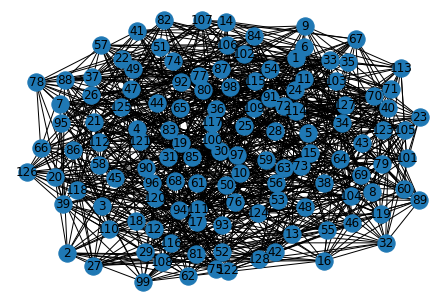

In [ ]:
nx.draw(G_lfr,with_labels=True)

In [ ]:
B_lfr.shape

(128, 128)

In [ ]:
B_lfr=np.asarray(B_lfr,dtype=np.float64)
inputs=torch.from_numpy(B_lfr)
targets=torch.from_numpy(B_lfr)
print(inputs.shape)

torch.Size([128, 128])


In [ ]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

In [ ]:
train_ds = TensorDataset(inputs, targets)

In [ ]:
len(train_ds)

128

In [ ]:
def givetrain(inputs,targets):  
  train_ds = TensorDataset(inputs, targets)
  train_dl=DataLoader(train_ds,batch_size=len(train_ds))
  return train_dl

In [ ]:
for xb, yb in givetrain(inputs,targets):
    print(xb)
    print(yb)
    break

tensor([[-0.1250, -0.1250, -0.1250,  ..., -0.1250, -0.1250, -0.1250],
        [-0.1250, -0.1250, -0.1250,  ..., -0.1250, -0.1250, -0.1250],
        [-0.1250, -0.1250, -0.1250,  ..., -0.1250, -0.1250, -0.1250],
        ...,
        [-0.1250, -0.1250, -0.1250,  ..., -0.1250, -0.1250, -0.1250],
        [-0.1250, -0.1250, -0.1250,  ..., -0.1250, -0.1250, -0.1250],
        [-0.1250, -0.1250, -0.1250,  ..., -0.1250, -0.1250, -0.1250]],
       dtype=torch.float64)
tensor([[-0.1250, -0.1250, -0.1250,  ..., -0.1250, -0.1250, -0.1250],
        [-0.1250, -0.1250, -0.1250,  ..., -0.1250, -0.1250, -0.1250],
        [-0.1250, -0.1250, -0.1250,  ..., -0.1250, -0.1250, -0.1250],
        ...,
        [-0.1250, -0.1250, -0.1250,  ..., -0.1250, -0.1250, -0.1250],
        [-0.1250, -0.1250, -0.1250,  ..., -0.1250, -0.1250, -0.1250],
        [-0.1250, -0.1250, -0.1250,  ..., -0.1250, -0.1250, -0.1250]],
       dtype=torch.float64)


In [ ]:
class AE(nn.Module):
    def __init__(self,in_layers,hidden_layers):
        super().__init__()
        # Encoder
        self.encoder_hidden_layer = nn.Linear(
            in_features=in_layers, out_features=hidden_layers
        )
        self.encoder_output_layer = nn.Linear(
            in_features=hidden_layers, out_features=hidden_layers
        )
        # DEcoder
        self.decoder_hidden_layer= nn.Linear(
            in_features=hidden_layers, out_features=hidden_layers
        )
        self.decoder_output_layer = nn.Linear(
            in_features=hidden_layers, out_features=in_layers
        )

    def forward(self, features):
        activation = self.encoder_hidden_layer(features)
        activation = torch.tanh(activation)
        activation = nn.Dropout(p=0.01)(activation)
        code = self.encoder_output_layer(activation)
        code = torch.tanh(code)
        code = nn.Dropout(p=0.01)(code)
        encoder=code
        activation = self.decoder_hidden_layer(code)
        activation = torch.tanh(activation)
        activation = nn.Dropout(p=0.01)(activation)
        activation = self.decoder_output_layer(activation)
        reconstructed = torch.tanh(activation)
        return encoder,reconstructed

In [ ]:
epochs = 1000
learning_rate = 1e-3

In [ ]:
#  use gpu if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# create a model from `AE` autoencoder class
# load it to the specified device, either gpu or cpu
model1 = AE(hidden_layers=64,in_layers=128).to(device)
model2=AE(hidden_layers=32,in_layers=64).to(device)
model3=AE(hidden_layers=16,in_layers=32).to(device)
# create an optimizer object
# Adam optimizer with learning rate 1e-3
optimizer1 = optim.Adam(model1.parameters(), lr=learning_rate)
optimizer2 = optim.Adam(model2.parameters(), lr=learning_rate)
optimizer3 = optim.Adam(model3.parameters(), lr=learning_rate)

# mean-squared error loss
def loss_func(input,target):
  return F.mse_loss(input,target)
print(model2)

AE(
  (encoder_hidden_layer): Linear(in_features=64, out_features=32, bias=True)
  (encoder_output_layer): Linear(in_features=32, out_features=32, bias=True)
  (decoder_hidden_layer): Linear(in_features=32, out_features=32, bias=True)
  (decoder_output_layer): Linear(in_features=32, out_features=64, bias=True)
)


In [ ]:
def train_model(epochs,train_dl,model,optimizer):
  enc,out=0,0
  for epoch in range(epochs):
    loss = 0
    for batch_features, _ in train_dl:
      # reshape mini-batch data to [N, 784] matrix
      # load it to the active device
      # batch_features = batch_features.view(-1, 784).to(device)
      
      # reset the gradients back to zero
      # PyTorch accumulates gradients on subsequent backward passes
        # optimizer.zero_grad()
        optimizer.zero_grad()
        # compute reconstructions
        encoder,outputs = model(batch_features.float())
        # out=outputs
        outputs=outputs.double()
        # compute training reconstruction loss
        train_loss = loss_func(outputs, batch_features)
        
        # compute accumulated gradients
        train_loss.backward()
        
        # perform parameter update based on current gradients
        optimizer.step()
        enc=encoder
        # add the mini-batch training loss to epoch loss
        loss += train_loss.item()
        # enc=encoder  
    # compute the epoch training loss
    loss = loss / len(train_dl)
    
    # display the epoch training loss
    print("epoch : {}/{}, recon loss = {:.8f}".format(epoch + 1, epochs, loss))
  return(enc)

In [ ]:
def train_model_new(epochs,train_dl,model,optimizer):
  enc,out=0,0
  for epoch in range(epochs):
    loss = 0
    for batch_features, _ in train_dl:
      # reshape mini-batch data to [N, 784] matrix
      # load it to the active device
      # batch_features = batch_features.view(-1, 784).to(device)
      
      # reset the gradients back to zero
      # PyTorch accumulates gradients on subsequent backward passes
        # optimizer.zero_grad()
        optimizer.zero_grad()
        # compute reconstructions
        encoder,outputs = model(batch_features)
        # out=outputs
        outputs=outputs
        # compute training reconstruction loss
        train_loss = loss_func(outputs, batch_features)
        
        # compute accumulated gradients
        train_loss.backward()
        
        # perform parameter update based on current gradients
        optimizer.step()
        enc=encoder
        # add the mini-batch training loss to epoch loss
        loss += train_loss.item()
        # enc=encoder  
    # compute the epoch training loss
    loss = loss / len(train_dl)
    
    # display the epoch training loss
    print("epoch : {}/{}, recon loss = {:.8f}".format(epoch + 1, epochs, loss))
  return(enc)

In [ ]:
train_dl=givetrain(inputs,targets)

encoder=train_model(200,train_dl,model1,optimizer1)
train_dl=givetrain(encoder.detach(),encoder.detach())
print(encoder.detach().shape)

encoder=train_model_new(200,train_dl,model2,optimizer2)
train_dl=givetrain(encoder.detach(),encoder.detach())
print(encoder.detach().shape)

# encoder=train_model_new(100,train_dl,model3,optimizer3)
# train_dl=givetrain(encoder.detach(),encoder.detach())
# print(encoder.detach().shape)

epoch : 1/200, recon loss = 0.11777716
epoch : 2/200, recon loss = 0.11588999
epoch : 3/200, recon loss = 0.11434012
epoch : 4/200, recon loss = 0.11295713
epoch : 5/200, recon loss = 0.11144955
epoch : 6/200, recon loss = 0.11032494
epoch : 7/200, recon loss = 0.10915286
epoch : 8/200, recon loss = 0.10804483
epoch : 9/200, recon loss = 0.10707906
epoch : 10/200, recon loss = 0.10601329
epoch : 11/200, recon loss = 0.10510592
epoch : 12/200, recon loss = 0.10408125
epoch : 13/200, recon loss = 0.10324893
epoch : 14/200, recon loss = 0.10235592
epoch : 15/200, recon loss = 0.10138150
epoch : 16/200, recon loss = 0.10058707
epoch : 17/200, recon loss = 0.09963440
epoch : 18/200, recon loss = 0.09877364
epoch : 19/200, recon loss = 0.09797390
epoch : 20/200, recon loss = 0.09718402
epoch : 21/200, recon loss = 0.09619356
epoch : 22/200, recon loss = 0.09541417
epoch : 23/200, recon loss = 0.09454866
epoch : 24/200, recon loss = 0.09362805
epoch : 25/200, recon loss = 0.09282257
epoch : 2

In [ ]:
B_lfr_X=encoder.detach().numpy()

In [ ]:
print(type(B_lfr_X),B_lfr_X)

<class 'numpy.ndarray'> [[ 0.48884243 -0.6819578   0.28499115 ... -0.2541319   0.2770982
  -0.32921943]
 [-0.43126202  0.12555927 -0.56541324 ...  0.14136276 -0.31114605
   0.34941202]
 [ 0.42495224  0.02479968  0.20787619 ... -0.5165378  -0.43201178
   0.26697245]
 ...
 [-0.6429542   0.05172188  0.05133328 ...  0.06095316 -0.05932683
   0.39971274]
 [ 0.00771164  0.5654791   0.36487895 ...  0.22138634 -0.66247106
   0.00362581]
 [-0.00168547  0.10839543  0.2233589  ...  0.6138398  -0.45013693
   0.13331091]]


In [ ]:
kmeans = KMeans(init='k-means++',n_clusters=4)
kmeans.fit(B_lfr_X)
X_ae = kmeans.labels_

c_groups=[]
c_attributes = nx.get_node_attributes(G_lfr,'value')
for i, val in enumerate(c_attributes.values()):
    c_groups.append(val)
        
X_gt = np.array(c_groups)
print(X_ae)
print(X_gt)
metrics.normalized_mutual_info_score(X_gt, X_ae, average_method='arithmetic')

[1 2 1 0 0 1 1 2 1 0 3 2 0 3 3 2 2 2 0 3 1 1 1 1 1 3 1 3 2 1 0 2 1 3 1 2 3
 1 0 1 1 2 1 2 0 0 3 2 3 3 3 2 1 3 2 2 3 3 3 2 1 2 3 1 3 1 1 2 2 0 3 2 1 1
 0 0 1 3 0 1 2 3 3 3 1 0 2 3 2 2 0 0 2 1 0 0 1 1 2 3 1 2 0 3 3 2 1 3 1 1 2
 0 2 3 1 0 1 1 2 0 0 3 0 2 0 3 2 2]
[1 4 4 4 1 1 4 1 1 2 1 2 2 3 2 2 2 2 1 4 4 3 1 1 3 3 4 1 2 3 4 2 3 1 3 1 4
 3 4 1 3 2 1 4 4 2 4 2 3 2 4 2 3 3 2 2 4 4 1 1 3 2 3 3 3 4 1 4 2 1 1 1 3 3
 2 2 3 3 1 3 4 3 3 3 4 4 1 4 2 4 1 4 4 3 4 2 4 3 2 3 1 1 1 2 1 1 3 2 1 2 2
 4 1 3 3 4 3 3 2 2 4 2 1 2 4 4 1 2]


0.1940791978667959

In [ ]:
max=0
index_max=0
for value in range(1,10000):
    kmeans = KMeans(init='k-means++',n_clusters=4,random_state=value)
    kmeans.fit(B_lfr_X)
    X_ae = kmeans.labels_

    c_groups=[]
    c_attributes = nx.get_node_attributes(G_lfr,'value')
    for i, val in enumerate(c_attributes.values()):
        c_groups.append(val)
            
    X_gt = np.array(c_groups)
    temp=metrics.normalized_mutual_info_score(X_gt, X_ae, average_method='arithmetic')
    if(temp>max):
        max=temp
        index_max=value
    print("Epoch:{}".format(value),index_max,max)

Streaming output truncated to the last 5000 lines.
Epoch:5001 2211 0.22487893776488835
Epoch:5002 2211 0.22487893776488835
Epoch:5003 2211 0.22487893776488835
Epoch:5004 2211 0.22487893776488835
Epoch:5005 2211 0.22487893776488835
Epoch:5006 2211 0.22487893776488835
Epoch:5007 2211 0.22487893776488835
Epoch:5008 2211 0.22487893776488835
Epoch:5009 2211 0.22487893776488835
Epoch:5010 2211 0.22487893776488835
Epoch:5011 2211 0.22487893776488835
Epoch:5012 2211 0.22487893776488835
Epoch:5013 2211 0.22487893776488835
Epoch:5014 2211 0.22487893776488835
Epoch:5015 2211 0.22487893776488835
Epoch:5016 2211 0.22487893776488835
Epoch:5017 2211 0.22487893776488835
Epoch:5018 2211 0.22487893776488835
Epoch:5019 2211 0.22487893776488835
Epoch:5020 2211 0.22487893776488835
Epoch:5021 2211 0.22487893776488835
Epoch:5022 2211 0.22487893776488835
Epoch:5023 2211 0.22487893776488835
Epoch:5024 2211 0.22487893776488835
Epoch:5025 2211 0.22487893776488835
Epoch:5026 2211 0.22487893776488835
Epoch:5027 22